## Identificar se a imagem Carregada é de um veículo.


In [1]:
import urllib
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

import json
import pickle as pk
from sklearn.metrics import classification_report, confusion_matrix
import cv2

In [2]:
import os
import h5py
import numpy as np
import pandas as pd

from keras.utils.data_utils import get_file
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History

Using TensorFlow backend.


In [3]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [4]:
#Keras GitHub  
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [5]:
vgg16 = VGG16(weights='imagenet')
vgg16.save('models/vgg16.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
resnet50 = ResNet50(weights='imagenet')
resnet50.save('models/resnet50.h5')

In [9]:
vgg19 = VGG19(weights='imagenet')
vgg19.save('models/vgg19.h5')

In [17]:
carsImageList = os.listdir('CarImages/Cars')
nonCarsImageList = os.listdir('CarImages/Non_Cars')

In [18]:
def prepare_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

## Testando se a Imagem é de um Veículo com VGG16, VGG19, Resnet e Inception

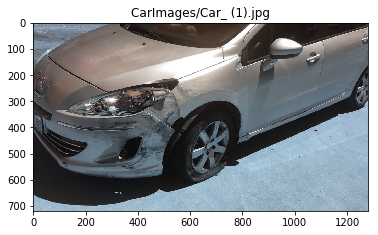

VGG16 Predictions: Image Car_ (1).jpg: [[('n03770679', 'minivan', 0.44915715), ('n03100240', 'convertible', 0.19698101), ('n02814533', 'beach_wagon', 0.07700231)]]
Resnet Predictions: Image Car_ (1).jpg: [[('n03770679', 'minivan', 0.80797017), ('n02814533', 'beach_wagon', 0.048134446), ('n03459775', 'grille', 0.042126108)]]
VGG19 Predictions: Image Car_ (1).jpg: [[('n03770679', 'minivan', 0.6132889), ('n03594945', 'jeep', 0.07906567), ('n02814533', 'beach_wagon', 0.060981315)]]
------------------


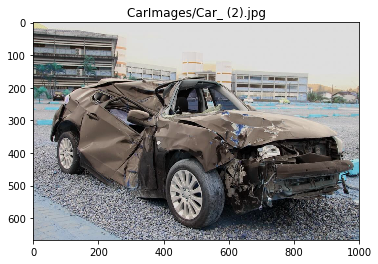

VGG16 Predictions: Image Car_ (2).jpg: [[('n03930630', 'pickup', 0.13521397), ('n02974003', 'car_wheel', 0.11057729), ('n04461696', 'tow_truck', 0.1041484)]]
Resnet Predictions: Image Car_ (2).jpg: [[('n02769748', 'backpack', 0.17808965), ('n03478589', 'half_track', 0.07935048), ('n04467665', 'trailer_truck', 0.07668403)]]
VGG19 Predictions: Image Car_ (2).jpg: [[('n03478589', 'half_track', 0.29090124), ('n04461696', 'tow_truck', 0.1509753), ('n03594945', 'jeep', 0.13016759)]]
------------------


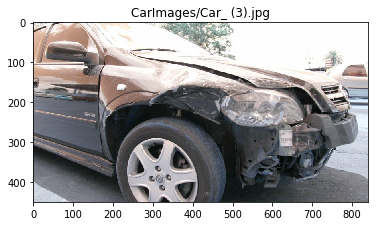

VGG16 Predictions: Image Car_ (3).jpg: [[('n04461696', 'tow_truck', 0.29681695), ('n03670208', 'limousine', 0.20789628), ('n03930630', 'pickup', 0.119916424)]]
Resnet Predictions: Image Car_ (3).jpg: [[('n03594945', 'jeep', 0.1821003), ('n03770679', 'minivan', 0.15744655), ('n02974003', 'car_wheel', 0.13426863)]]
VGG19 Predictions: Image Car_ (3).jpg: [[('n03478589', 'half_track', 0.35256588), ('n03594945', 'jeep', 0.30101764), ('n03670208', 'limousine', 0.18237874)]]
------------------


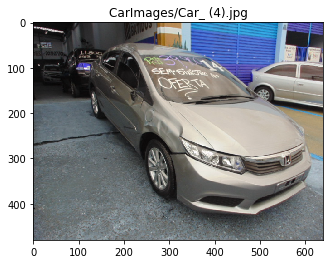

VGG16 Predictions: Image Car_ (4).jpg: [[('n03770679', 'minivan', 0.6291864), ('n04285008', 'sports_car', 0.0599966), ('n03100240', 'convertible', 0.05050727)]]
Resnet Predictions: Image Car_ (4).jpg: [[('n03770679', 'minivan', 0.7103), ('n03670208', 'limousine', 0.05678962), ('n02814533', 'beach_wagon', 0.035931446)]]
VGG19 Predictions: Image Car_ (4).jpg: [[('n03770679', 'minivan', 0.43897098), ('n03100240', 'convertible', 0.11657382), ('n02814533', 'beach_wagon', 0.08786858)]]
------------------


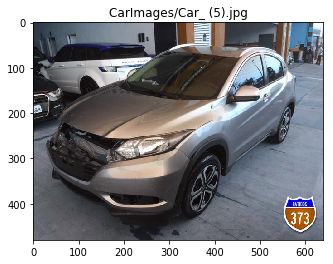

VGG16 Predictions: Image Car_ (5).jpg: [[('n04285008', 'sports_car', 0.7466916), ('n03100240', 'convertible', 0.12022396), ('n04037443', 'racer', 0.0270898)]]
Resnet Predictions: Image Car_ (5).jpg: [[('n03770679', 'minivan', 0.43761206), ('n04285008', 'sports_car', 0.26733497), ('n03100240', 'convertible', 0.06670843)]]
VGG19 Predictions: Image Car_ (5).jpg: [[('n04285008', 'sports_car', 0.37583575), ('n03670208', 'limousine', 0.15171039), ('n02814533', 'beach_wagon', 0.10938445)]]
------------------


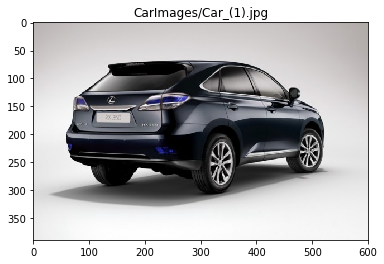

VGG16 Predictions: Image Car_(1).jpg: [[('n03100240', 'convertible', 0.42502502), ('n02814533', 'beach_wagon', 0.17708895), ('n04285008', 'sports_car', 0.14187518)]]
Resnet Predictions: Image Car_(1).jpg: [[('n03770679', 'minivan', 0.3278977), ('n02814533', 'beach_wagon', 0.3126352), ('n02974003', 'car_wheel', 0.11854632)]]
VGG19 Predictions: Image Car_(1).jpg: [[('n03100240', 'convertible', 0.59505165), ('n04285008', 'sports_car', 0.22642419), ('n02974003', 'car_wheel', 0.05818155)]]
------------------


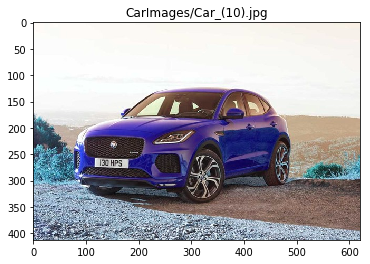

VGG16 Predictions: Image Car_(10).jpg: [[('n03930630', 'pickup', 0.289774), ('n02974003', 'car_wheel', 0.17666292), ('n04285008', 'sports_car', 0.15496956)]]
Resnet Predictions: Image Car_(10).jpg: [[('n02974003', 'car_wheel', 0.2500359), ('n03930630', 'pickup', 0.20487228), ('n03459775', 'grille', 0.15466666)]]
VGG19 Predictions: Image Car_(10).jpg: [[('n04285008', 'sports_car', 0.2959448), ('n03930630', 'pickup', 0.18091571), ('n04037443', 'racer', 0.15699907)]]
------------------


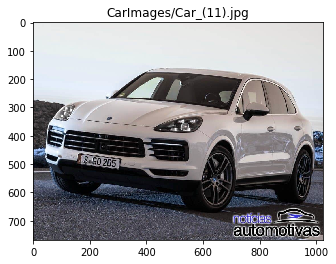

VGG16 Predictions: Image Car_(11).jpg: [[('n04037443', 'racer', 0.42606288), ('n04285008', 'sports_car', 0.2568247), ('n02814533', 'beach_wagon', 0.07040561)]]
Resnet Predictions: Image Car_(11).jpg: [[('n04285008', 'sports_car', 0.31829795), ('n03459775', 'grille', 0.1936346), ('n02974003', 'car_wheel', 0.113427386)]]
VGG19 Predictions: Image Car_(11).jpg: [[('n04037443', 'racer', 0.34859893), ('n04285008', 'sports_car', 0.24449976), ('n02974003', 'car_wheel', 0.120352)]]
------------------


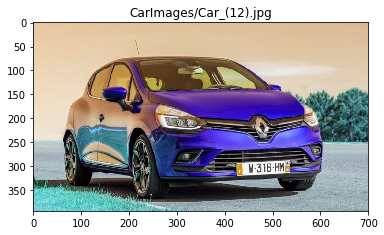

VGG16 Predictions: Image Car_(12).jpg: [[('n03770679', 'minivan', 0.4911855), ('n02814533', 'beach_wagon', 0.1574705), ('n03459775', 'grille', 0.10150425)]]
Resnet Predictions: Image Car_(12).jpg: [[('n03459775', 'grille', 0.23736526), ('n02814533', 'beach_wagon', 0.18199061), ('n02974003', 'car_wheel', 0.16062438)]]
VGG19 Predictions: Image Car_(12).jpg: [[('n04285008', 'sports_car', 0.18061437), ('n03770679', 'minivan', 0.14811437), ('n03459775', 'grille', 0.1284253)]]
------------------


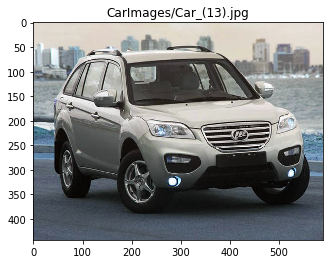

VGG16 Predictions: Image Car_(13).jpg: [[('n03930630', 'pickup', 0.6345017), ('n04461696', 'tow_truck', 0.048954118), ('n02930766', 'cab', 0.038716886)]]
Resnet Predictions: Image Car_(13).jpg: [[('n03930630', 'pickup', 0.4436976), ('n03770679', 'minivan', 0.11926981), ('n04461696', 'tow_truck', 0.08163513)]]
VGG19 Predictions: Image Car_(13).jpg: [[('n03770679', 'minivan', 0.17995709), ('n03930630', 'pickup', 0.15869984), ('n03594945', 'jeep', 0.15669596)]]
------------------


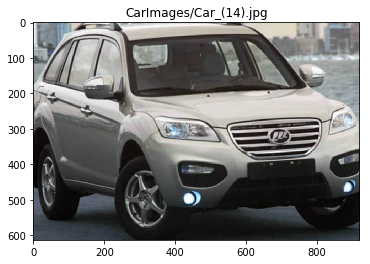

VGG16 Predictions: Image Car_(14).jpg: [[('n03930630', 'pickup', 0.556021), ('n03769881', 'minibus', 0.07511414), ('n04461696', 'tow_truck', 0.062111817)]]
Resnet Predictions: Image Car_(14).jpg: [[('n03769881', 'minibus', 0.30793548), ('n03930630', 'pickup', 0.23860377), ('n03594945', 'jeep', 0.10792978)]]
VGG19 Predictions: Image Car_(14).jpg: [[('n03930630', 'pickup', 0.1908396), ('n03594945', 'jeep', 0.089153126), ('n02930766', 'cab', 0.089094736)]]
------------------


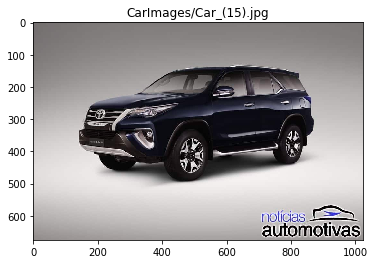

VGG16 Predictions: Image Car_(15).jpg: [[('n03770679', 'minivan', 0.32902545), ('n02814533', 'beach_wagon', 0.25357652), ('n02974003', 'car_wheel', 0.09406818)]]
Resnet Predictions: Image Car_(15).jpg: [[('n03594945', 'jeep', 0.7311014), ('n03930630', 'pickup', 0.15542994), ('n02814533', 'beach_wagon', 0.050161127)]]
VGG19 Predictions: Image Car_(15).jpg: [[('n02974003', 'car_wheel', 0.16685985), ('n04037443', 'racer', 0.13403615), ('n03770679', 'minivan', 0.13310233)]]
------------------


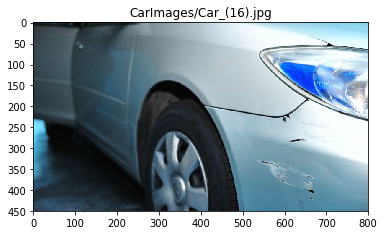

VGG16 Predictions: Image Car_(16).jpg: [[('n04285008', 'sports_car', 0.23933583), ('n03770679', 'minivan', 0.22350632), ('n02974003', 'car_wheel', 0.0970688)]]
Resnet Predictions: Image Car_(16).jpg: [[('n03770679', 'minivan', 0.7820404), ('n03769881', 'minibus', 0.05279188), ('n03670208', 'limousine', 0.014040855)]]
VGG19 Predictions: Image Car_(16).jpg: [[('n03770679', 'minivan', 0.70972425), ('n03670208', 'limousine', 0.04478034), ('n03100240', 'convertible', 0.03794783)]]
------------------


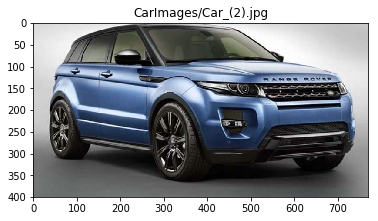

VGG16 Predictions: Image Car_(2).jpg: [[('n04285008', 'sports_car', 0.29797605), ('n02814533', 'beach_wagon', 0.23168717), ('n03459775', 'grille', 0.1281733)]]
Resnet Predictions: Image Car_(2).jpg: [[('n03594945', 'jeep', 0.50626606), ('n03930630', 'pickup', 0.14924264), ('n03459775', 'grille', 0.096210904)]]
VGG19 Predictions: Image Car_(2).jpg: [[('n03930630', 'pickup', 0.2522568), ('n03594945', 'jeep', 0.18400793), ('n02974003', 'car_wheel', 0.14504221)]]
------------------


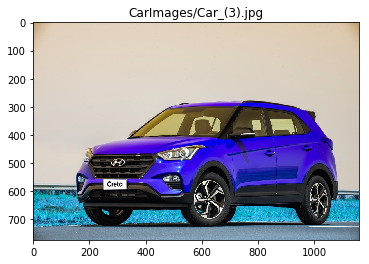

VGG16 Predictions: Image Car_(3).jpg: [[('n03930630', 'pickup', 0.29898396), ('n02974003', 'car_wheel', 0.18218783), ('n04037443', 'racer', 0.12154533)]]
Resnet Predictions: Image Car_(3).jpg: [[('n03930630', 'pickup', 0.34755617), ('n02974003', 'car_wheel', 0.19970904), ('n03770679', 'minivan', 0.16096517)]]
VGG19 Predictions: Image Car_(3).jpg: [[('n03770679', 'minivan', 0.51884186), ('n03930630', 'pickup', 0.14094757), ('n02974003', 'car_wheel', 0.10333484)]]
------------------


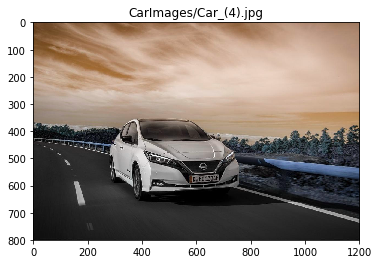

VGG16 Predictions: Image Car_(4).jpg: [[('n04467665', 'trailer_truck', 0.2706574), ('n04037443', 'racer', 0.15481523), ('n03670208', 'limousine', 0.08718545)]]
Resnet Predictions: Image Car_(4).jpg: [[('n04467665', 'trailer_truck', 0.7015737), ('n03770679', 'minivan', 0.21844955), ('n04065272', 'recreational_vehicle', 0.017000096)]]
VGG19 Predictions: Image Car_(4).jpg: [[('n04467665', 'trailer_truck', 0.47752967), ('n02965783', 'car_mirror', 0.19448346), ('n03670208', 'limousine', 0.08751238)]]
------------------


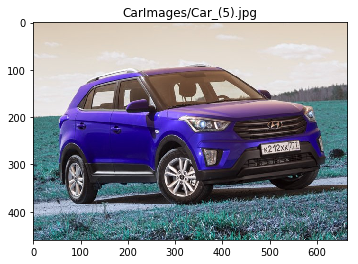

VGG16 Predictions: Image Car_(5).jpg: [[('n03770679', 'minivan', 0.38074762), ('n03930630', 'pickup', 0.1967237), ('n03594945', 'jeep', 0.16850293)]]
Resnet Predictions: Image Car_(5).jpg: [[('n03930630', 'pickup', 0.38358957), ('n02974003', 'car_wheel', 0.13527802), ('n03594945', 'jeep', 0.11469657)]]
VGG19 Predictions: Image Car_(5).jpg: [[('n03770679', 'minivan', 0.33803067), ('n03594945', 'jeep', 0.2324922), ('n03930630', 'pickup', 0.12850524)]]
------------------


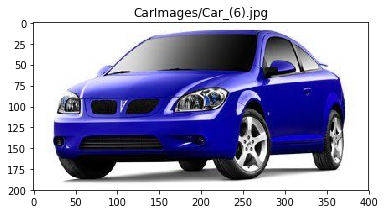

VGG16 Predictions: Image Car_(6).jpg: [[('n03930630', 'pickup', 0.7613261), ('n02814533', 'beach_wagon', 0.0511009), ('n03459775', 'grille', 0.041050155)]]
Resnet Predictions: Image Car_(6).jpg: [[('n03930630', 'pickup', 0.3795909), ('n03459775', 'grille', 0.18359213), ('n02974003', 'car_wheel', 0.14918676)]]
VGG19 Predictions: Image Car_(6).jpg: [[('n03930630', 'pickup', 0.25918308), ('n02814533', 'beach_wagon', 0.1286875), ('n03459775', 'grille', 0.07672529)]]
------------------


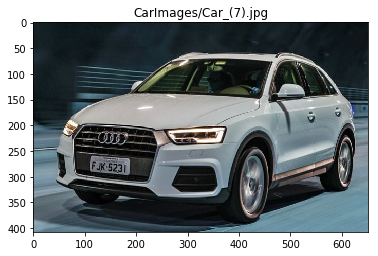

VGG16 Predictions: Image Car_(7).jpg: [[('n04037443', 'racer', 0.21959297), ('n02814533', 'beach_wagon', 0.16154876), ('n04285008', 'sports_car', 0.15995882)]]
Resnet Predictions: Image Car_(7).jpg: [[('n03930630', 'pickup', 0.36064342), ('n03459775', 'grille', 0.13517268), ('n04037443', 'racer', 0.108631395)]]
VGG19 Predictions: Image Car_(7).jpg: [[('n04037443', 'racer', 0.30015582), ('n03930630', 'pickup', 0.17719415), ('n02814533', 'beach_wagon', 0.12042314)]]
------------------


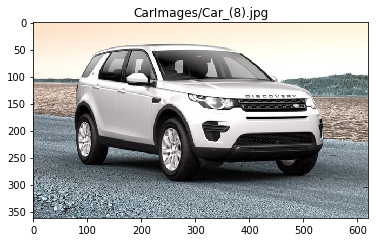

VGG16 Predictions: Image Car_(8).jpg: [[('n03930630', 'pickup', 0.5410373), ('n03770679', 'minivan', 0.13266), ('n02974003', 'car_wheel', 0.052004583)]]
Resnet Predictions: Image Car_(8).jpg: [[('n03930630', 'pickup', 0.58379436), ('n03594945', 'jeep', 0.1392525), ('n03770679', 'minivan', 0.088986136)]]
VGG19 Predictions: Image Car_(8).jpg: [[('n03770679', 'minivan', 0.2862706), ('n03930630', 'pickup', 0.15938373), ('n02814533', 'beach_wagon', 0.11468162)]]
------------------


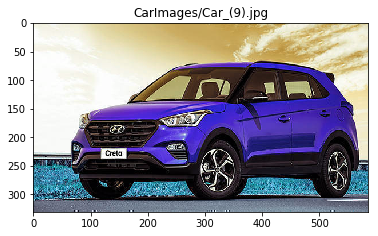

VGG16 Predictions: Image Car_(9).jpg: [[('n03594945', 'jeep', 0.31712246), ('n03930630', 'pickup', 0.21332382), ('n03770679', 'minivan', 0.1789877)]]
Resnet Predictions: Image Car_(9).jpg: [[('n03770679', 'minivan', 0.3744133), ('n03930630', 'pickup', 0.24508652), ('n03459775', 'grille', 0.08980205)]]
VGG19 Predictions: Image Car_(9).jpg: [[('n03594945', 'jeep', 0.49389216), ('n03770679', 'minivan', 0.25956735), ('n03930630', 'pickup', 0.12512918)]]
------------------


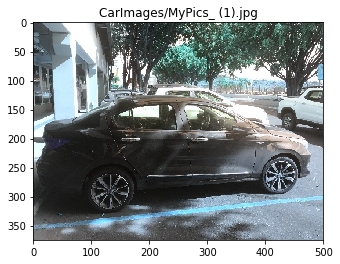

VGG16 Predictions: Image MyPics_ (1).jpg: [[('n03100240', 'convertible', 0.36758083), ('n04285008', 'sports_car', 0.1433668), ('n04037443', 'racer', 0.11080567)]]
Resnet Predictions: Image MyPics_ (1).jpg: [[('n03100240', 'convertible', 0.24117304), ('n03770679', 'minivan', 0.23927568), ('n02974003', 'car_wheel', 0.16656427)]]
VGG19 Predictions: Image MyPics_ (1).jpg: [[('n03100240', 'convertible', 0.29035577), ('n02814533', 'beach_wagon', 0.17050149), ('n03770679', 'minivan', 0.109256424)]]
------------------


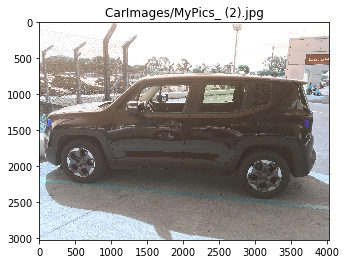

VGG16 Predictions: Image MyPics_ (2).jpg: [[('n03930630', 'pickup', 0.6714106), ('n04461696', 'tow_truck', 0.08379441), ('n04252225', 'snowplow', 0.06824128)]]
Resnet Predictions: Image MyPics_ (2).jpg: [[('n03594945', 'jeep', 0.29558378), ('n03930630', 'pickup', 0.28467494), ('n03770679', 'minivan', 0.13881029)]]
VGG19 Predictions: Image MyPics_ (2).jpg: [[('n03930630', 'pickup', 0.3466433), ('n03594945', 'jeep', 0.18997784), ('n03770679', 'minivan', 0.13941397)]]
------------------


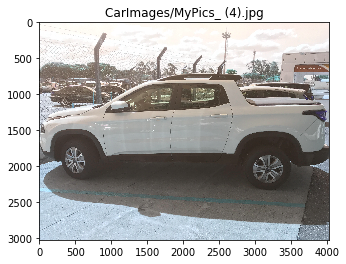

VGG16 Predictions: Image MyPics_ (4).jpg: [[('n03930630', 'pickup', 0.79976606), ('n03594945', 'jeep', 0.14095737), ('n04461696', 'tow_truck', 0.020582624)]]
Resnet Predictions: Image MyPics_ (4).jpg: [[('n03930630', 'pickup', 0.2990812), ('n02814533', 'beach_wagon', 0.25218114), ('n03594945', 'jeep', 0.2200908)]]
VGG19 Predictions: Image MyPics_ (4).jpg: [[('n03930630', 'pickup', 0.53855747), ('n03594945', 'jeep', 0.27776444), ('n04461696', 'tow_truck', 0.051935583)]]
------------------


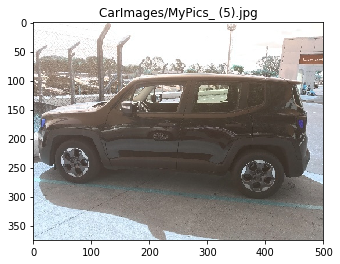

VGG16 Predictions: Image MyPics_ (5).jpg: [[('n03930630', 'pickup', 0.7335333), ('n04461696', 'tow_truck', 0.07974044), ('n04252225', 'snowplow', 0.063391)]]
Resnet Predictions: Image MyPics_ (5).jpg: [[('n03930630', 'pickup', 0.3499353), ('n03770679', 'minivan', 0.18581733), ('n03594945', 'jeep', 0.13460466)]]
VGG19 Predictions: Image MyPics_ (5).jpg: [[('n03930630', 'pickup', 0.35071734), ('n04461696', 'tow_truck', 0.2003829), ('n03770679', 'minivan', 0.10699967)]]
------------------


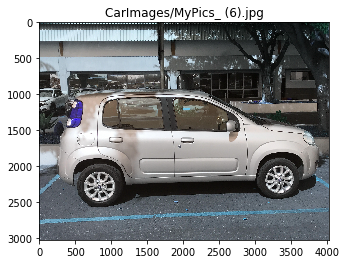

VGG16 Predictions: Image MyPics_ (6).jpg: [[('n03770679', 'minivan', 0.3299299), ('n03930630', 'pickup', 0.25899407), ('n04461696', 'tow_truck', 0.07125939)]]
Resnet Predictions: Image MyPics_ (6).jpg: [[('n03770679', 'minivan', 0.9325597), ('n03796401', 'moving_van', 0.007692983), ('n03930630', 'pickup', 0.0072734808)]]
VGG19 Predictions: Image MyPics_ (6).jpg: [[('n03770679', 'minivan', 0.8654499), ('n03930630', 'pickup', 0.015843801), ('n04461696', 'tow_truck', 0.0149923)]]
------------------


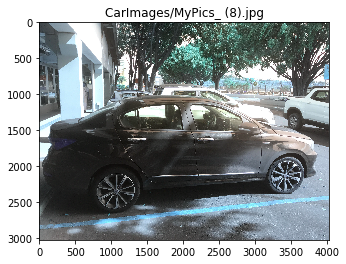

VGG16 Predictions: Image MyPics_ (8).jpg: [[('n03100240', 'convertible', 0.49552712), ('n04285008', 'sports_car', 0.17988785), ('n04037443', 'racer', 0.11730447)]]
Resnet Predictions: Image MyPics_ (8).jpg: [[('n03770679', 'minivan', 0.28273278), ('n02974003', 'car_wheel', 0.18242104), ('n03459775', 'grille', 0.14916585)]]
VGG19 Predictions: Image MyPics_ (8).jpg: [[('n03100240', 'convertible', 0.2834521), ('n02814533', 'beach_wagon', 0.17562568), ('n03770679', 'minivan', 0.1345719)]]
------------------


In [23]:
for eachCar in carsImageList:
    image_path = 'CarImages/Cars/{}'.format(eachCar)
    image = prepare_image(image_path)
    
    imageView = cv2.imread(image_path)
    plt.imshow(imageView)
    plt.title(image_path)
    plt.show()
    
    predictions = vgg16.predict(image)
    print('VGG16 Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    predictions = resnet50.predict(image)
    print('Resnet Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    predictions = vgg19.predict(image)
    print('VGG19 Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    print('------------------')

In [ ]:
for eachNonCar in nonCarsImageList:
    image_path = 'CarImages/Non_Cars/{}'.format(eachCar)
    image = prepare_image(image_path)
    
    imageView = cv2.imread(image_path)
    plt.imshow(imageView)
    plt.title(image_path)
    plt.show()
    
    predictions = vgg16.predict(image)
    print('VGG16 Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    predictions = resnet50.predict(image)
    print('Resnet Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    predictions = vgg19.predict(image)
    print('VGG19 Predictions: Image {}: {}'.format(eachCar,get_predictions(predictions, top=3)))
    print('------------------')